![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [182]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [183]:
crimes.shape

(185715, 12)

In [184]:
crimes.describe()

,DR_NO,Vict Age
count,1.857150e+05,185715.000000
mean,2.255781e+08,39.999257
std,5.017438e+06,15.450227
min,2.009072e+08,2.000000
25%,2.210108e+08,28.000000
50%,2.220114e+08,37.000000
75%,2.310044e+08,50.000000
max,2.399097e+08,99.000000


In [185]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  object
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(2), object(10)
memory usage: 17.0+ MB


In [186]:
crimes.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Desc',
       'Status Desc', 'LOCATION'],
      dtype='object')

# Data Cleaning

### Dropping duplicates

In [187]:
crimes.drop_duplicates(inplace= True)

## Checking for missing values

In [188]:
crimes.isna().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
dtype: int64

In [189]:
(crimes['Vict Sex'].isna().mean()) * 100

0.005923054142099453

In [190]:
# Dropping rows with missing vals in Sex as missing vals  are just 0.006%
crimes['Vict Sex'].dropna(inplace=True)

In [191]:
(crimes['Weapon Desc'].isna().mean()) * 100

60.422152222491455

As Weapon Desc has more than 60% missing vals, we're imputing it with 'Unknown', as weapon is an important info in many cases , so we keep this column

In [192]:
crimes['Weapon Desc'].fillna('Unknown', inplace=True)

### Converting 'Date Rptd', 'DATE OCC' to Datetime

In [193]:
crimes['Date Rptd'] = pd.to_datetime(crimes['Date Rptd'])
crimes['DATE OCC'] = pd.to_datetime(crimes['DATE OCC'])

### Converting 'TIME OCC' to datetime

In [194]:
# Pad with zeros (so '5' becomes '0005', '945' becomes '0945')
crimes['TIME OCC'] = crimes['TIME OCC'].astype(str).str.zfill(4)
# converting to  datetime.time format
crimes['TIME OCC'] = pd.to_datetime(crimes['TIME OCC'], format='%H%M')

In [195]:
crimes['TIME OCC'].head()

0   1900-01-01 11:10:00
1   1900-01-01 16:20:00
2   1900-01-01 12:00:00
3   1900-01-01 06:35:00
4   1900-01-01 09:00:00
Name: TIME OCC, dtype: datetime64[ns]

### Converting columns with repeated labels to 'category'

In [196]:
cat_cols = [
    'AREA NAME', 'Crm Cd Desc', 'Vict Sex',
    'Vict Descent', 'Weapon Desc',
    'Status Desc'
]

for col in cat_cols:
    crimes[col] = crimes[col].astype('category')

In [197]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  datetime64[ns]
 4   AREA NAME     185715 non-null  category      
 5   Crm Cd Desc   185715 non-null  category      
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  category      
 8   Vict Descent  185705 non-null  category      
 9   Weapon Desc   185715 non-null  category      
 10  Status Desc   185715 non-null  category      
 11  LOCATION      185715 non-null  object        
dtypes: category(6), datetime64[ns](3), int64(2), object(1)
memory usage: 11.0+ MB


## Formatting column names and all Categorical Data

In [198]:
crimes.columns = crimes.columns.str.title()

In [199]:
crimes.columns

Index(['Dr_No', 'Date Rptd', 'Date Occ', 'Time Occ', 'Area Name',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Desc',
       'Status Desc', 'Location'],
      dtype='object')

In [200]:
cat_cols = ['Area Name','Crm Cd Desc', 'Vict Sex', 'Vict Descent', 'Weapon Desc',
       'Status Desc']
for col in cat_cols:
    crimes[col]=crimes[col].str.title()

# Exploratory Data Analysis (EDA)

## Univariate Analysis (Categorical)

### 1. Top 10 crime types:

<AxesSubplot: >

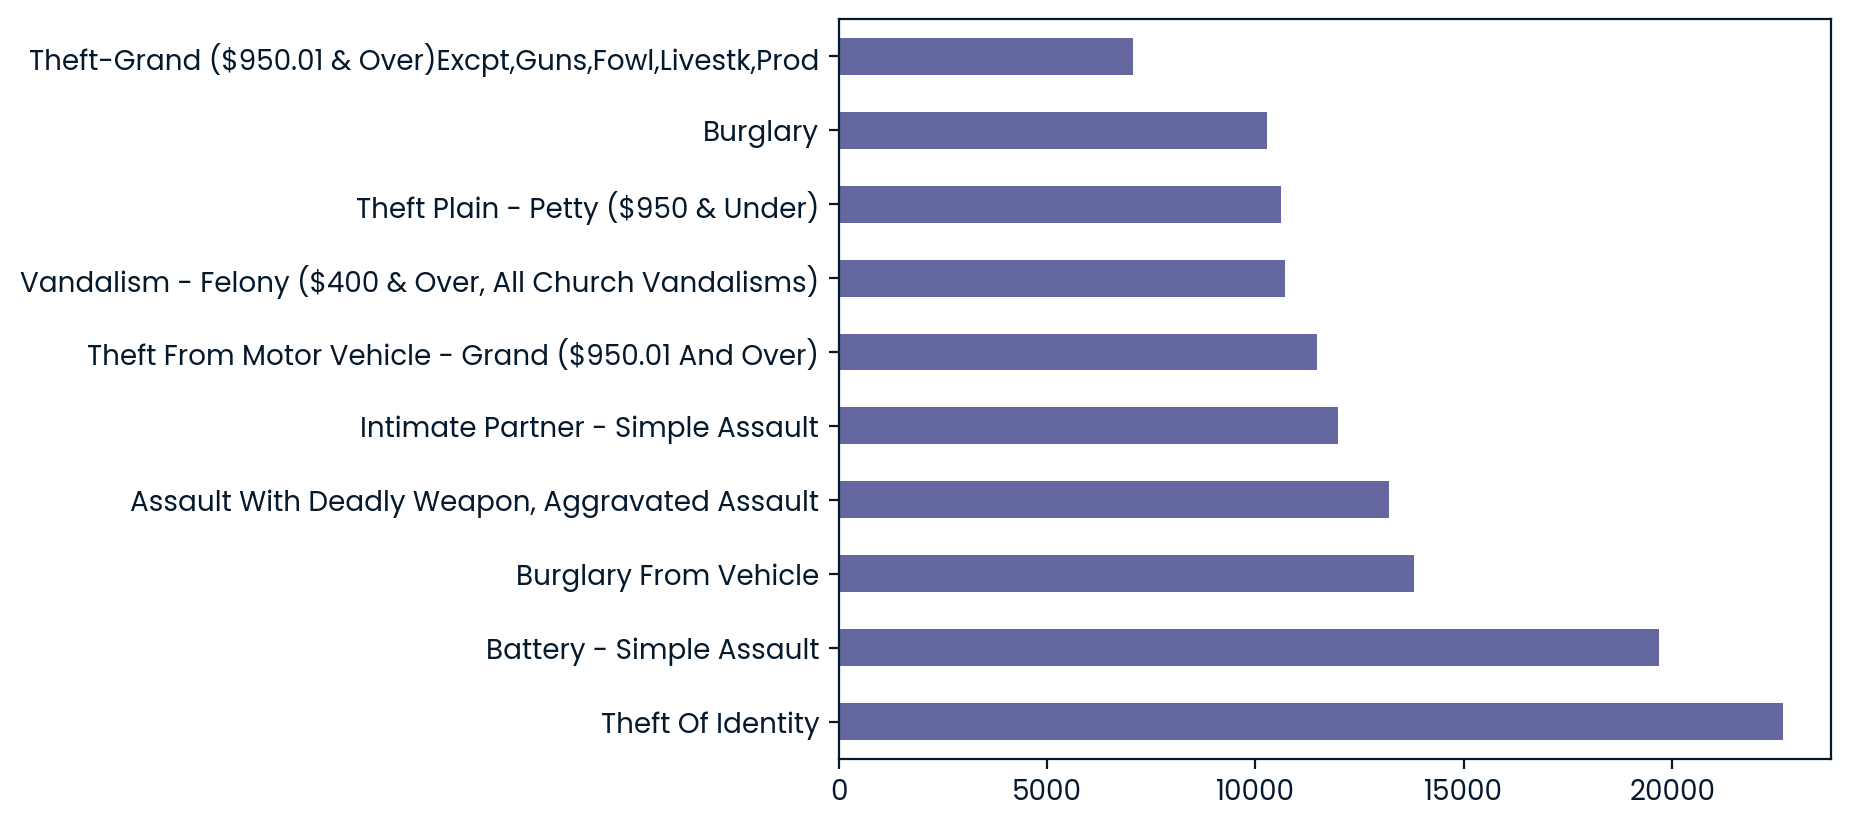

In [201]:
crimes['Crm Cd Desc'].value_counts().head(10).plot(kind='barh')

### 2. Most common crime locations:

<AxesSubplot: >

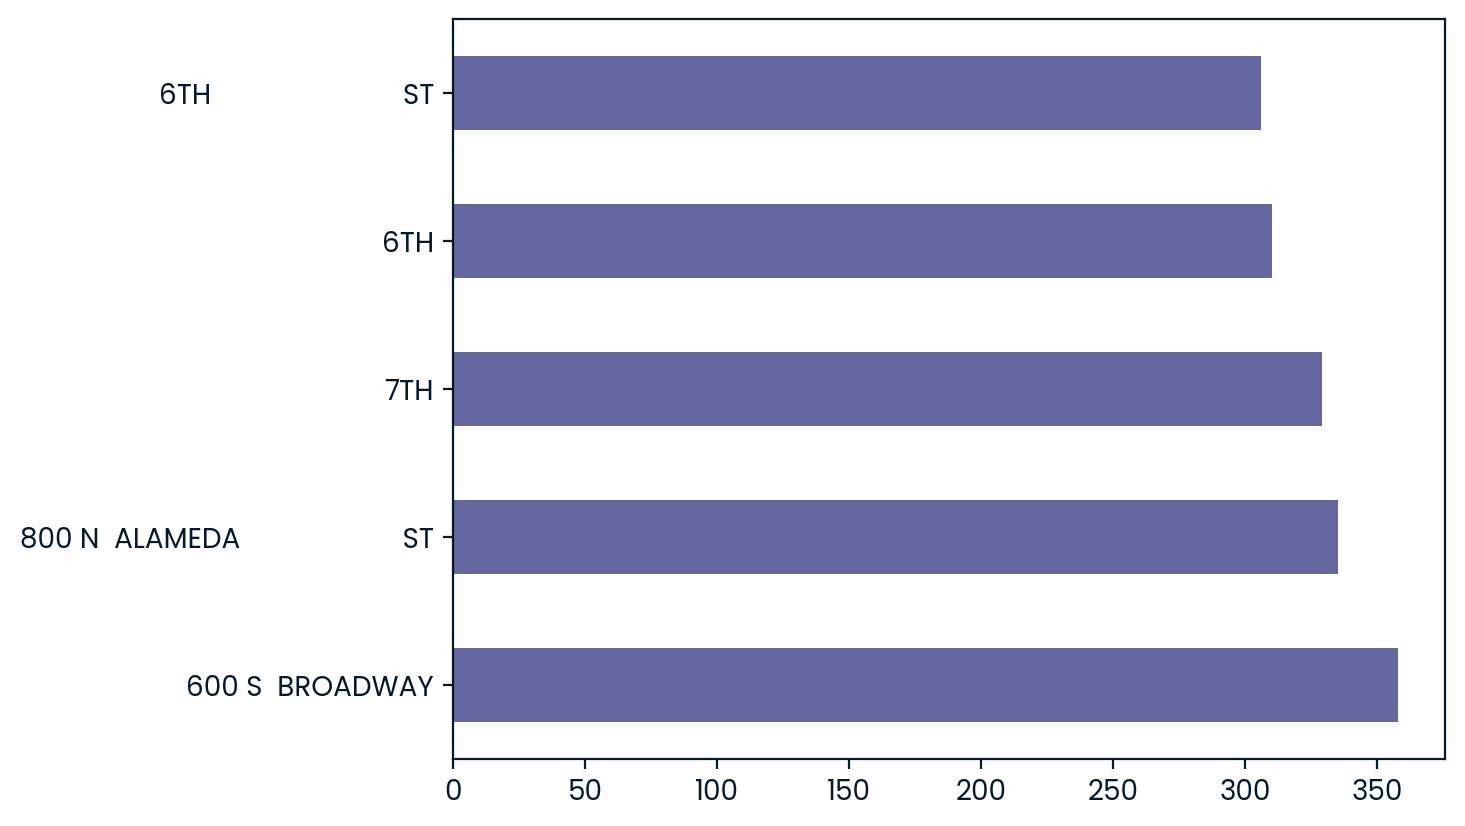

In [202]:
crimes['Location'].value_counts().head().plot(kind='barh')

### 3. Gender Distribution

<AxesSubplot: xlabel='Vict Sex', ylabel='count'>

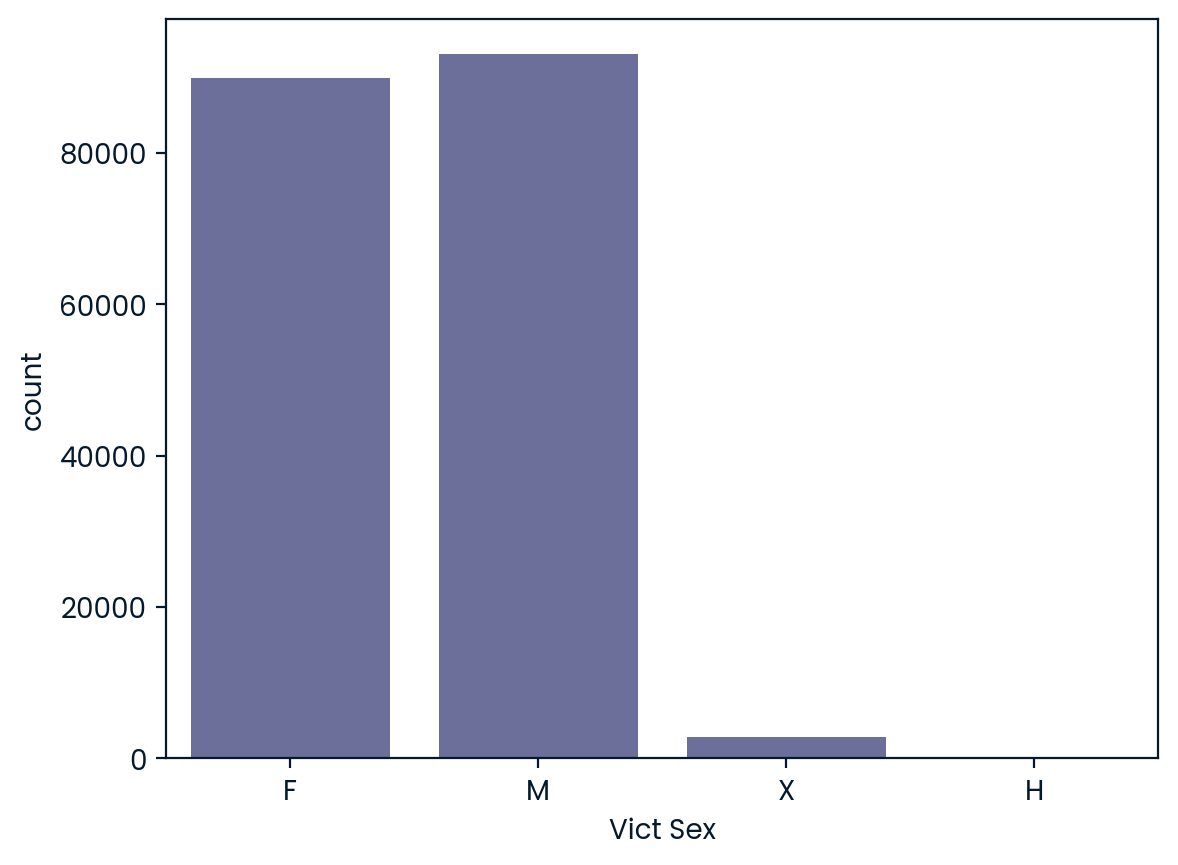

In [203]:
sns.countplot(data=crimes, x='Vict Sex')

## Univariate Analysis (Numerical)

### 1. Age Distribution

<AxesSubplot: xlabel='Vict Age', ylabel='Count'>

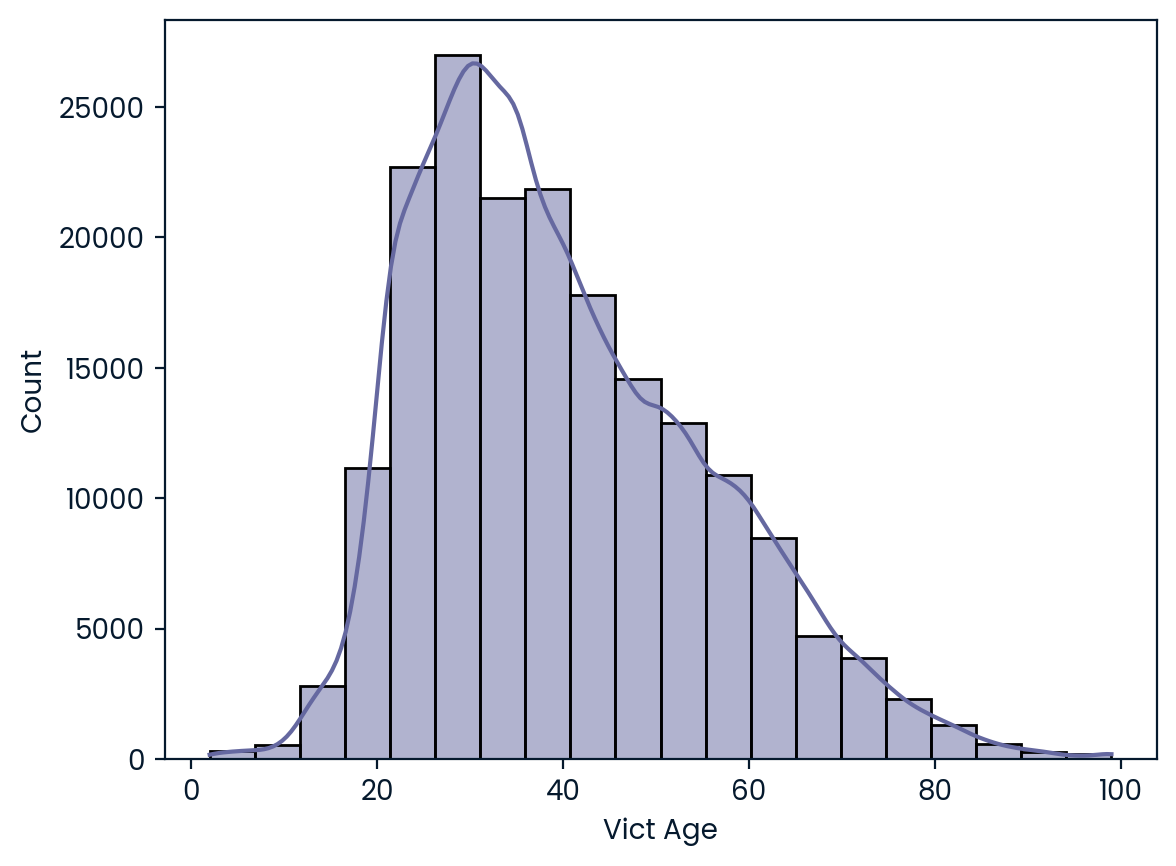

In [204]:
sns.histplot(data=crimes, x='Vict Age', bins=20, kde=True)

### 2. Checking for outliers in victoms age col

<AxesSubplot: xlabel='Vict Age'>

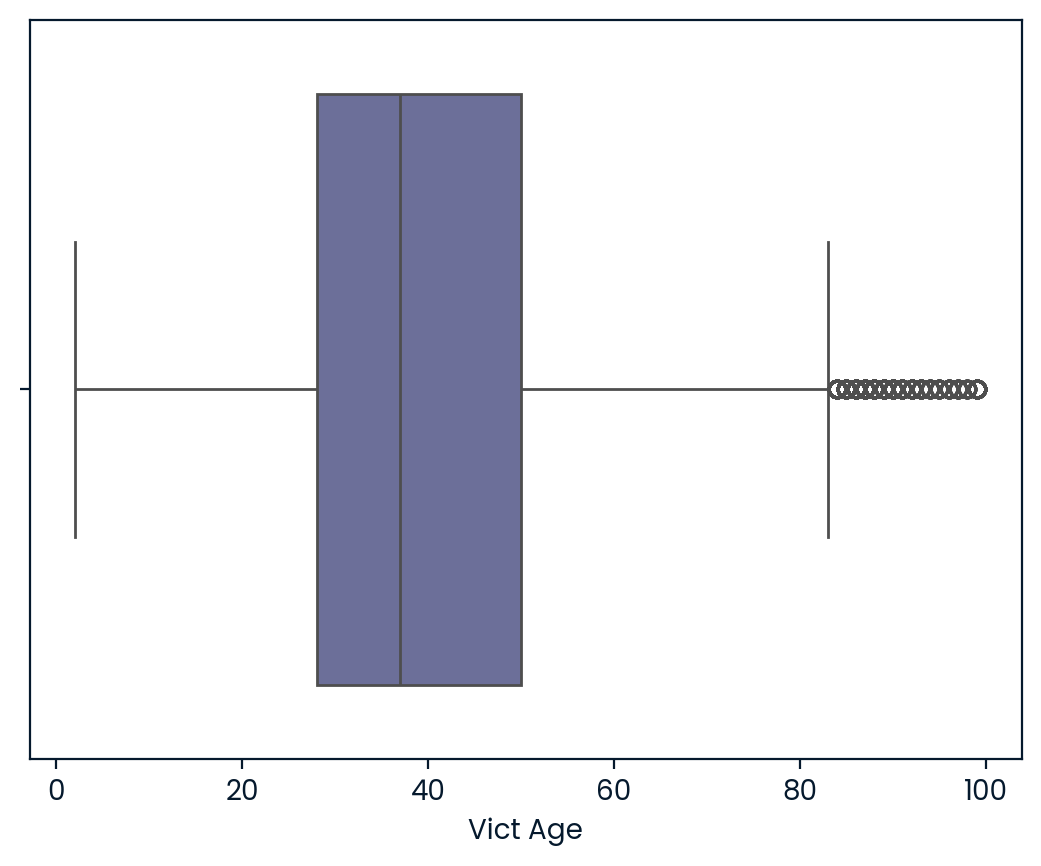

In [205]:
sns.boxplot(data=crimes, x='Vict Age')

## TASKS:

### 1 .Which hour has the highest frequency of crimes? Storing it as an integer variable called peak_crime_hour

peak_crime_hour:  12


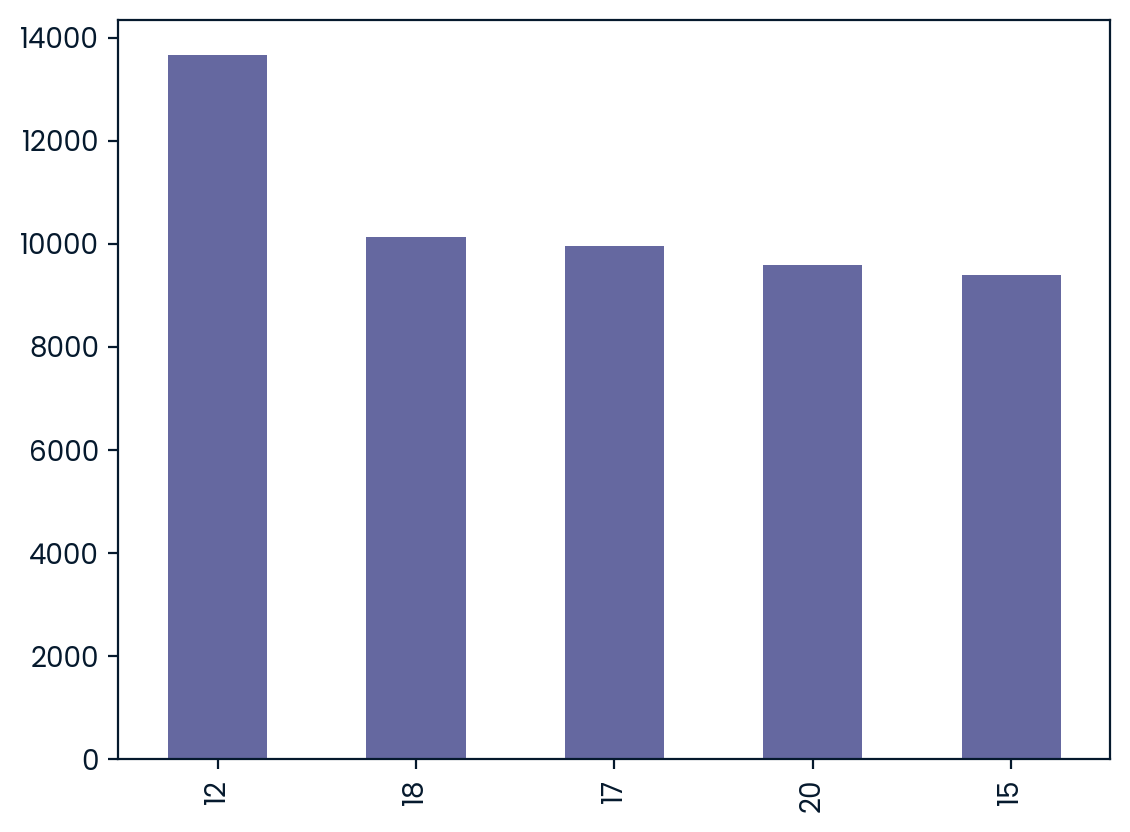

In [206]:
crimes['hour']=crimes['Time Occ'].dt.hour
crimes['hour'].value_counts().head(5).plot(kind='bar')
peak_crime_hour =crimes['hour'].value_counts().idxmax()
print(f'peak_crime_hour:  {peak_crime_hour}')

### 2. Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? 

peak_night_crime_location :Central


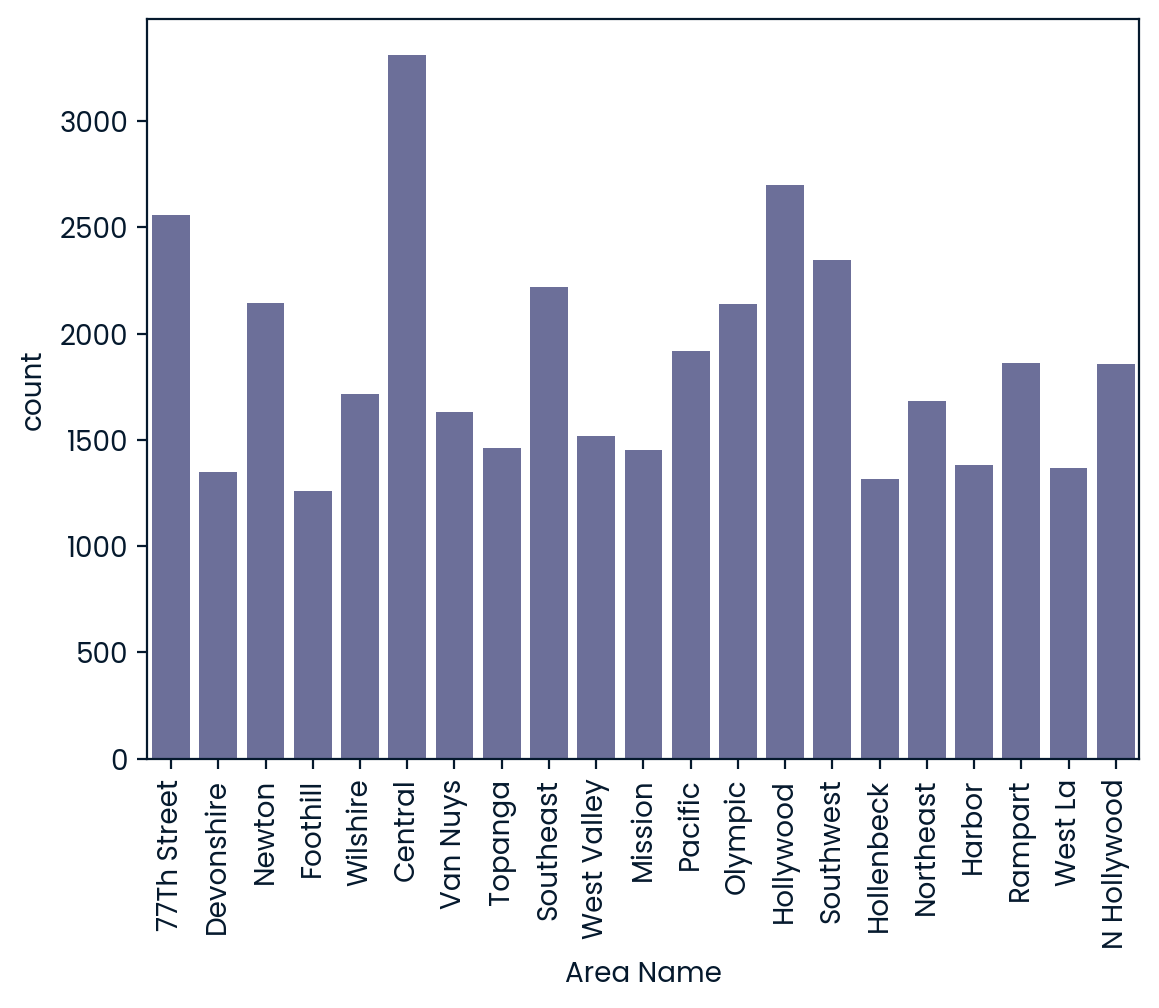

In [207]:
import matplotlib.pyplot as plt
night_crimes= crimes[(crimes['hour'] >= 22) | (crimes['hour'] < 4)]
sns.countplot(x='Area Name', data=night_crimes)
plt.xticks(rotation=90)

peak_night_crime_location= night_crimes['Area Name'].value_counts().idxmax()
print(f'peak_night_crime_location :{peak_night_crime_location}')

### 3. Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: Age Group, dtype: int64


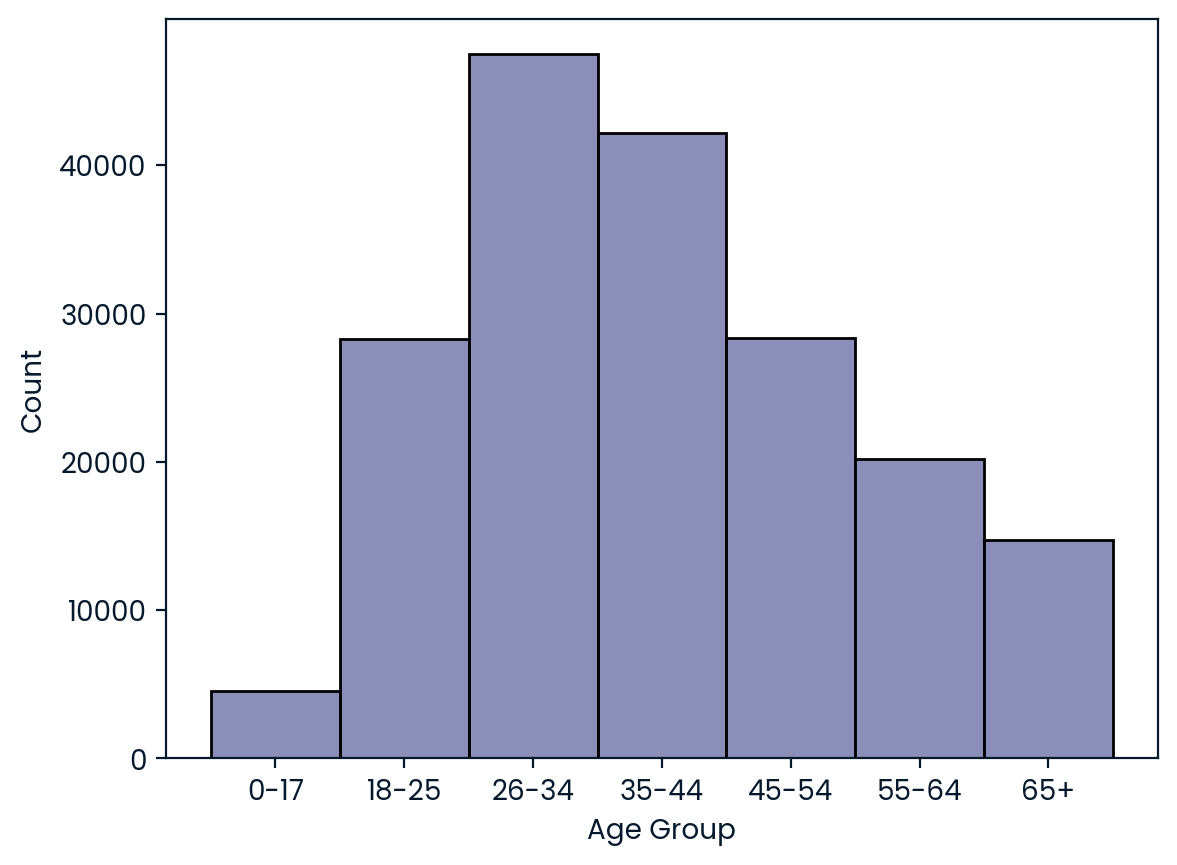

In [208]:
bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+" ]

# new column for age categories
crimes['Age Group'] = pd.cut(crimes['Vict Age'], bins=bins, labels=labels, right=True)
sns.histplot(x='Age Group', data=crimes)

victim_ages=crimes['Age Group'].value_counts().sort_index()
print(victim_ages)

# Bi/ multivariate Analysis

### 1. Are most common crimes more likely at night or day?

In [218]:
top_crimes = crimes['Crm Cd Desc'].value_counts().head(6).index
top_crimes

Index(['Theft Of Identity', 'Battery - Simple Assault',
       'Burglary From Vehicle',
       'Assault With Deadly Weapon, Aggravated Assault',
       'Intimate Partner - Simple Assault',
       'Theft From Motor Vehicle - Grand ($950.01 And Over)'],
      dtype='object')

<AxesSubplot: xlabel='hour', ylabel='Crm Cd Desc'>

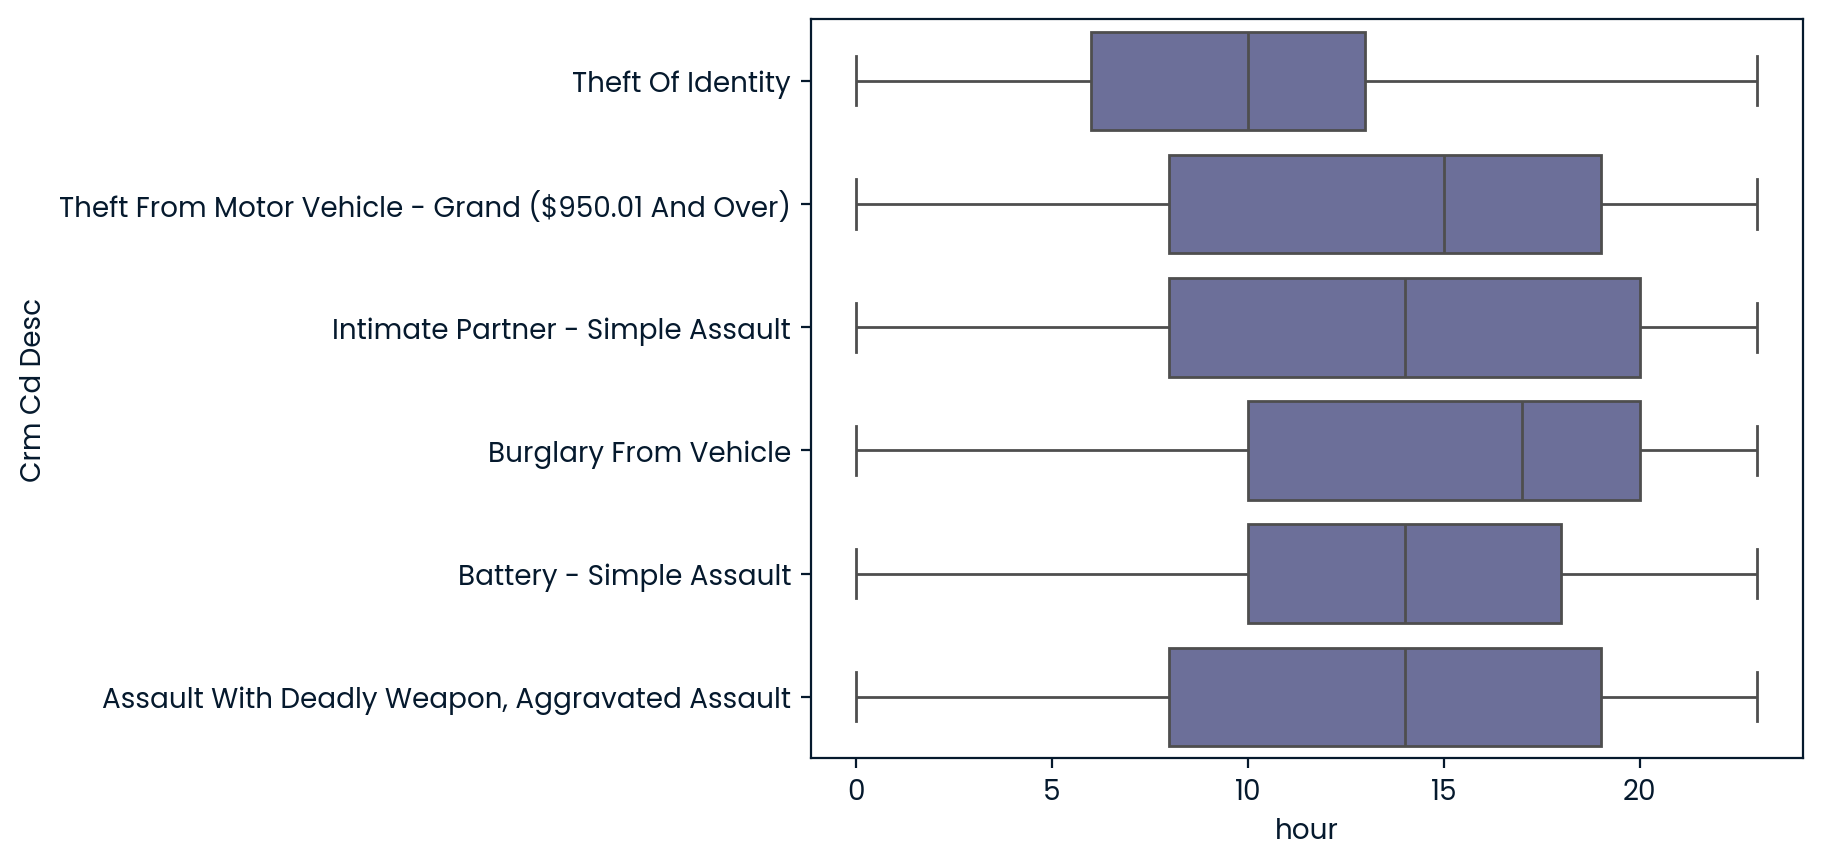

In [226]:
subset= crimes[crimes['Crm Cd Desc'].isin(top_crimes)]
sns.boxplot(data=subset, x='hour', y='Crm Cd Desc')

### 2. Heatmaps

<AxesSubplot: >

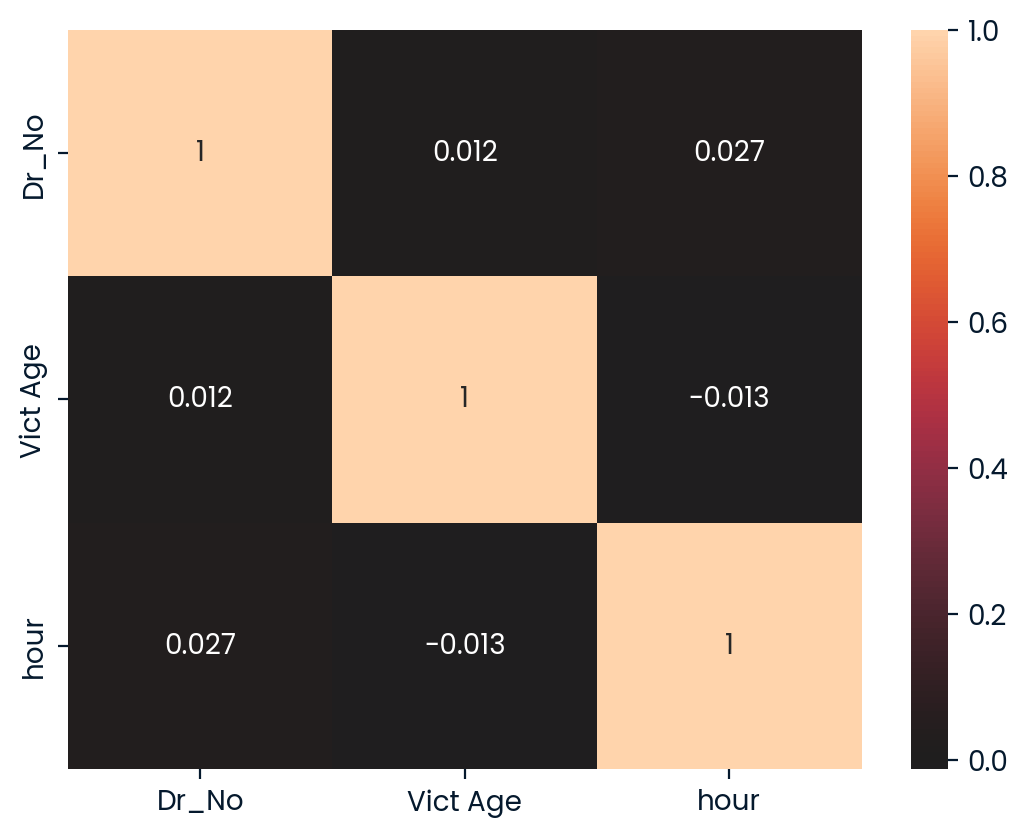

In [230]:
sns.heatmap(crimes.corr(), annot=True, center=0)

### Insights:
- Time of crime doesnt have to do anything with victim's age
- There is no specific correlation among numerical columns

<AxesSubplot: xlabel='Vict Sex', ylabel='Crm Cd Desc'>

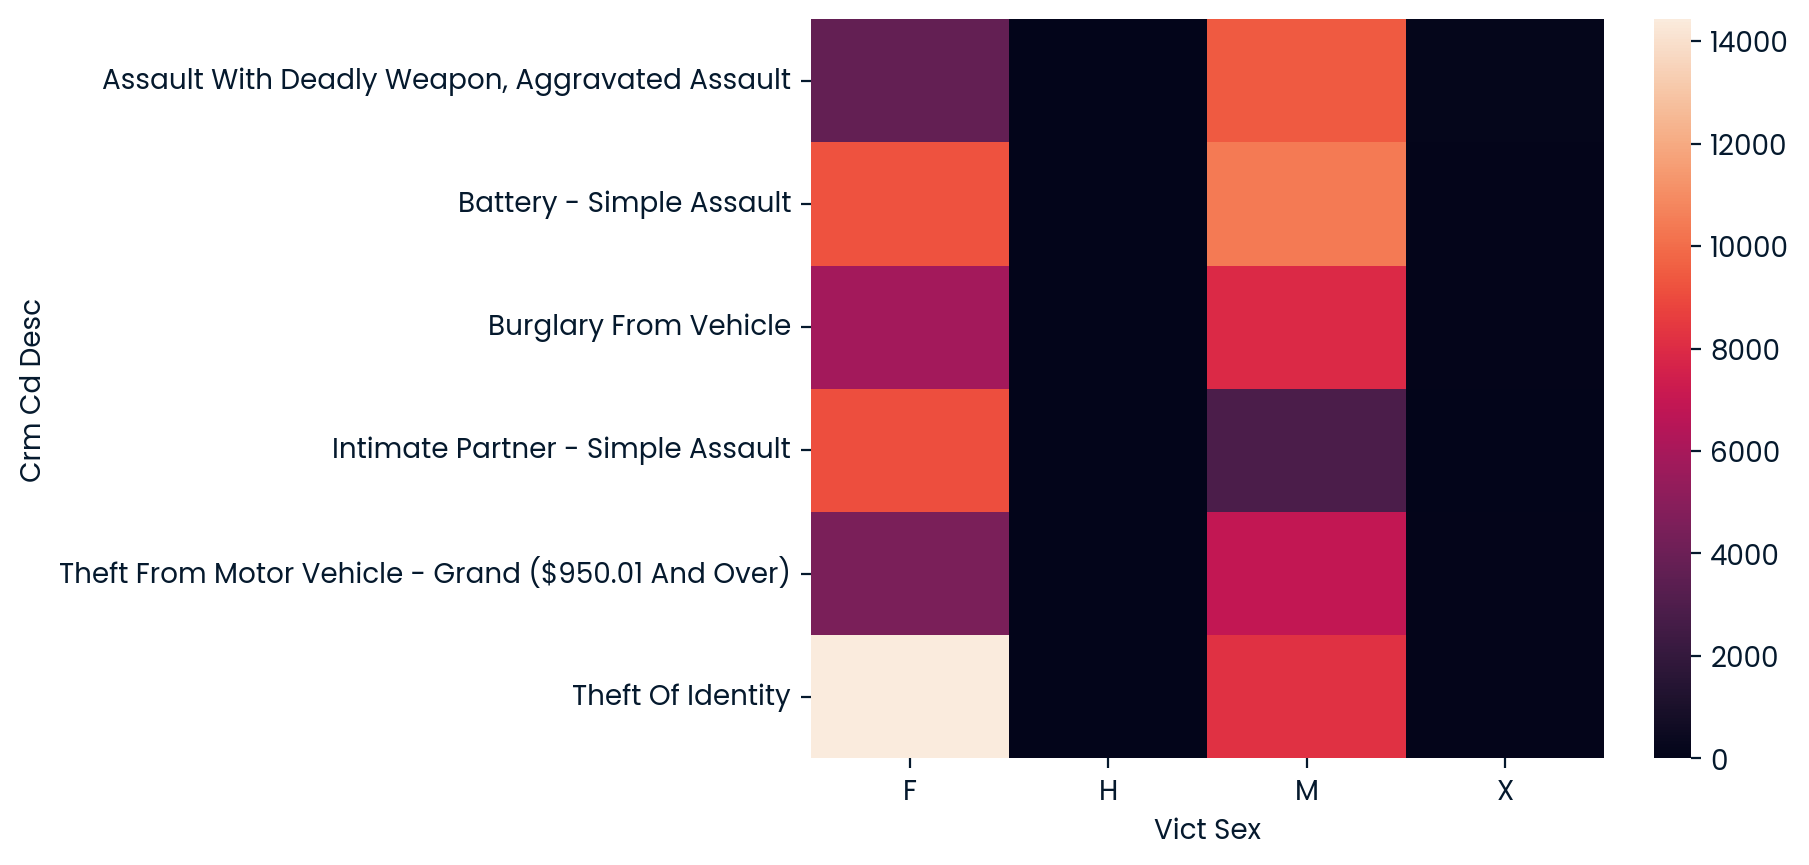

In [235]:
sns.heatmap(pd.crosstab(subset['Crm Cd Desc'], subset['Vict Sex']))

### Insights:
- Most common crime against female victims is **Theft of identity**
- Most common crimes against male victims are **Battery - simple assult** and **Assult with deadly weapon**